In [11]:
import util
from tqdm import tqdm
import numpy as np

train_loader, val_loader, test_loader = util.make_loaders(batch_size = 1, mode = 'test', sample_mode='')

pixel_counts = []
values = []
for sample in train_loader:
    #image_count+=1
    #parcel_counts = np.append(parcel_counts, len(sample['masks']))
    #print(sample['masks'].shape)
    #print(sample['values'].shape)


    for mask in sample['masks'][0]:
        pixel_counts.append(np.count_nonzero(mask))
    for value in sample['values'][0]:
        values.append(value)

for sample in test_loader:
    #image_count+=1
    #parcel_counts = np.append(parcel_counts, len(sample['masks']))
    #print(sample['masks'].shape)
    #print(sample['values'].shape)


    for mask in sample['masks'][0]:
        pixel_counts.append(np.count_nonzero(mask))
    for value in sample['values'][0]:
        values.append(value)

for sample in val_loader:
    #image_count+=1
    #parcel_counts = np.append(parcel_counts, len(sample['masks']))
    #print(sample['masks'].shape)
    #print(sample['values'].shape)


    for mask in sample['masks'][0]:
        pixel_counts.append(np.count_nonzero(mask))
    for value in sample['values'][0]:
        values.append(value)


#print(image_count)
#print(parcel_counts)
#print(np.mean(pixel_counts))
#print(np.mean(values))

1915 1532.0 191.5 192


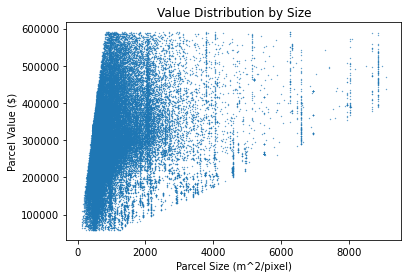

983.8149317959256
286346.4173896253


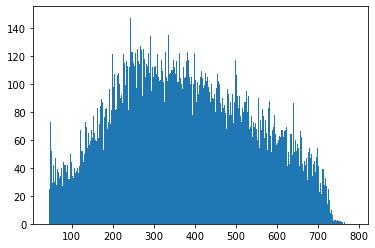

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns

#vals = pd.DataFrame(np.array(values))
vals = np.array(values)
sizes = np.array(pixel_counts)

indices = np.nonzero(values)
vals = np.array(vals)[indices]
sizes = np.array(sizes)[indices]

plt.scatter(sizes,vals, s=0.1)
plt.title("Value Distribution by Size")
plt.xlabel('Parcel Size (m^2/pixel)')
plt.ylabel('Parcel Value ($)')
#plt.set_xlim(0,500000)
#plt.set_ylim(0,500000)
plt.savefig('/u/amo-d0/grad/cgar/Projects/disaggregation/Plots/value_dist.jpg')
plt.show()

ratio = np.divide(vals,sizes)
plt.hist(ratio, bins=1000)

#ax = sns.kdeplot(x = vals, y = sizes,
#     fill= True, thresh=0, levels =10,cmap="mako")
#ax.set(xlabel = "True Values", ylabel = "Estimated Value", title= "Prediction Density Plot")
#plt.savefig(density_pth)
#plt.show()

print(sizes.mean())
print(vals.mean())

379.7390193528816


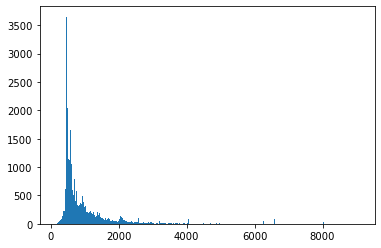

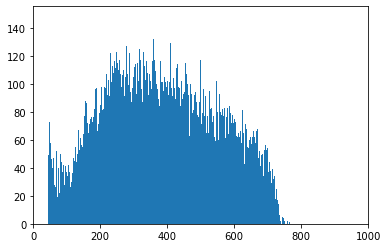

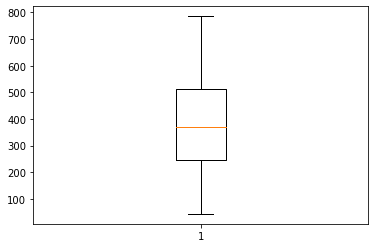

[286.9047619  256.02755454 235.03325942 ... 128.03234501 218.22742475
 185.3820598 ]


In [13]:
avg = vals/sizes
avg.mean()
print(avg.mean())

plt.hist(sizes,bins = 1000)
plt.show()
plt.hist(avg,bins=1000)
plt.xlim(0,1000)
plt.show()
plt.boxplot(avg)
plt.show()

print(avg)

In [4]:
import util
from tqdm import tqdm
import numpy as np

ds = util.make_dataset('train', sample_mode='')

pixel_counts_2 = []
values_2 = []
for sample in tqdm(ds):


    for mask in sample['masks']:
        pixel_counts_2.append(np.count_nonzero(mask))
    for value in sample['values']:
        values_2.append(value)

100%|██████████| 1915/1915 [05:47<00:00,  5.51it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/u/eag-d1/data/Hennepin/compiled_302x302_gsd1/imgs/1915.png'

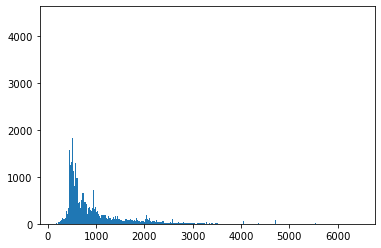

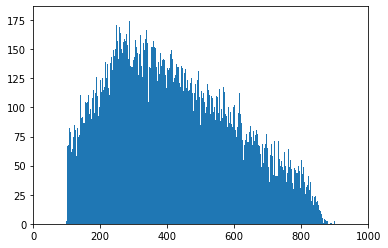

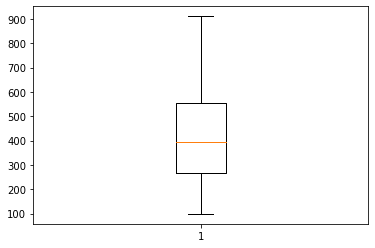

In [22]:
sizes_2 = np.array(pixel_counts_2)
vals_2 = np.array(values_2)
avg_2 = vals_2/sizes_2


plt.hist(sizes_2,bins = 1000)
plt.show()
plt.hist(avg_2,bins=1000)
plt.xlim(0,1000)
plt.show()
plt.boxplot(avg_2)
plt.show()